**Identificação**: Luiz Sigolis (1983794) ; Vanessa de Oliveira Gil (2077382) ; Nelson Conceicao (2714567)

# Projeto II - Futuro dos Dados e Aplicação de Big Data

## Avaliação I - Introdução e Fundamentação Teórica

### **Análise dos resultados de sentimento das Avaliações da Amazon Alexa**

###  Definição do Tema: Avaliações da Amazon Alexa

As empresas centradas nos clientes consideram prioritária a mensuração da qualidade dos serviços e a satisfação dos seus usuários. Comparar o desempenho da empresa com a expectativa é a base do conceito de satisfação dos clientes. Esse indicador está relacionado ao maior retorno sobre o investimento (ROI), fidelização, volume de compras e valorização da marca. Um sistema de avaliação da satisfação é a base para decisões quanto à gestão da qualidade dos serviços. Entretanto, a obtenção desses dados é feita por levantamentos envolvendo diversos fatores do ciclo de serviço, que geralmente tem muitas etapas, sendo que algumas delas não são percebidas ou valorizadas pelos clientes.

Os fatores que mais contribuem para a satisfação devem ser valorizados e comunicados para sua clientela, o que pode gerar um círculo virtuoso de mais satisfação, mais vendas e mais lucros. A moldagem dos fatores que geram satisfação ou que evitam a insatisfação faz com que as empresas modifiquem as operações e ações de marketing.

Inspiração:
Seus dados estarão em frente à maior comunidade de ciência de dados do mundo. Que perguntas você deseja ver respondidas?

> **Objetivo**

Esse projeto tem como objetivo aplicar algoritmos de machine learning para prever e avaliar as avaliações/reviews positivas/negativas dos produtos do ecossistema Alexa.

> **Especificação Técnica**

Dataset: Para desenvolvimento desse projeto, será utilizado o dataset denominado "amazon_alexa.tsv", disponível em: <https://www.kaggle.com/sid321axn/amazon-alexa-reviews >.

Este conjunto de dados consiste em aproximadamente 3.000 avaliações de clientes da Amazon que são os reviews, as avaliações com estrelas (1-5), data da avaliação, modelo do produto e feedbacks. Dentre os produtos, estão registrados a Alexa Echo, Echo dots, Alexa Firesticks, dentre outros.

Formato: 

*   **Rating** = Notas de Avaliação de 1 até 5 (int).
*   **Date** = Data da realização da Avaliação. 
*   **Variation** = Diferentes modelos de Alexa.
*   **Verified_reviews** = Devolutiva comentada das avaliações.
*   **feedback** = Retorno das avaliações de 0 a 1 (int).


Métodos de Pré-processamento: 
* Limpeza dos dados (Duplicados/Nulos)
* Remoção de Stopwords e pontuações
* Técnicas de Oversampling

Tarefa de Aprendizado: Será aplicado a tarefa de NLP e Análise de Sentimentos.

Algoritmos Avaliados: SVC, RidgeClassifier, Perceptron, PassiveAggressiveClassifier, SGDClassifier, Bernoulli e RandomForestClassifier

## Avaliação 2 - Metodologia, Resultados e Discussão (Segunda parte): Preparação dos Dados

### Importando Bibliotecas utilizadas neste projeto

In [1]:
# Importar Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from google.colab import data_table

### Importando o Dataset

In [2]:
# Importando o Dataset do GitHub
url = "https://raw.githubusercontent.com/luizsigolis/AlexaReviews-MLProject/main/amazon_alexa.tsv"
dataset = pd.read_csv(url, sep='\t', header=0)

### Exibição de trechos dos dados

In [3]:
"""
Dimensão dos dados:
  - Linhas: 3150
  - Colunas (Variáveis): 5 (rating,	date,	variation,	verified_reviews,	feedback)
"""
dataset.shape

(3150, 5)

In [4]:
# Exibição de trecho dos dados pós-importação e pré-limpeza (5 Colunas e 3150 Linhas)
data_table.DataTable(dataset, include_index=True, num_rows_per_page=10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
# Exibição de informações adicionais sobre os dados do dataset, onde é possível observar que não há nulos no dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
# Exibição da estatística descritiva do dataset
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


*    Na exibição da estatística descritiva do dataset, podemos observar que temos 3150 revisões, onde a média das notas das revisões é igual a 4.46, o valor mínimo é 1, o valor máximo é 5 e o desvio padrão é de aproximadamente 1.06.

### **Pré-Processamento dos Dados**

* Verificar se haviam dados duplicados e/ou nulos
* Remoção de dados duplicados
* Limpeza do Texto



In [7]:
# Verificar dados duplicados
dataset.duplicated().sum()

print('Há {} linhas duplicadas'.format(dataset.duplicated().sum()))

Há 715 linhas duplicadas


In [8]:
# Verificar dados nulos
dataset.isnull().sum()

print('Qtde de dados nulos:\n\n{}'.format(dataset.isnull().sum()))

Qtde de dados nulos:

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [9]:
# Remoção de dados duplicados
dataset.drop_duplicates(inplace=True)

### Informação de novo dataset pós-remoção dos duplicados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2800
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            2435 non-null   int64 
 1   date              2435 non-null   object
 2   variation         2435 non-null   object
 3   verified_reviews  2435 non-null   object
 4   feedback          2435 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 114.1+ KB


In [10]:
# Verificar se há valores na coluna "Feedback" diferentes de 0 ou 1
dataset['feedback'].unique()

print("Valores existentes na coluna Feedback =\n{}\n".format(dataset['feedback'].unique()))
print("Temos o total de {} reviews\n".format(dataset.shape[0]))

print("Feedback = 1 é uma review positiva. \nFeedback = 0 é uma review negativa\n")

# Verificar se há valores na coluna "Rating" diferentes de 1 a 5
dataset['rating'].unique()

print("Valores existentes na coluna Rating =\n{}\n".format(dataset['rating'].unique()))

print("Rating variando de 1 a 5 sendo: \n1 a pior nota\n5 a melhor nota")

Valores existentes na coluna Feedback =
[1 0]

Temos o total de 2435 reviews

Feedback = 1 é uma review positiva. 
Feedback = 0 é uma review negativa

Valores existentes na coluna Rating =
[5 4 3 2 1]

Rating variando de 1 a 5 sendo: 
1 a pior nota
5 a melhor nota


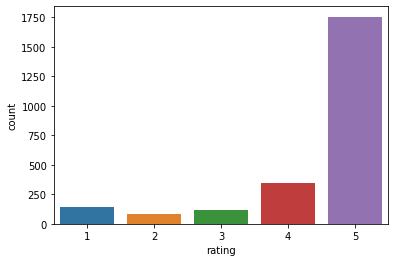

In [11]:
# Plotando um gráfico da variável "Rating" para obter uma visão geral e possíveis outliers (valores discrepantes)
sns.countplot(x='rating', data=dataset)

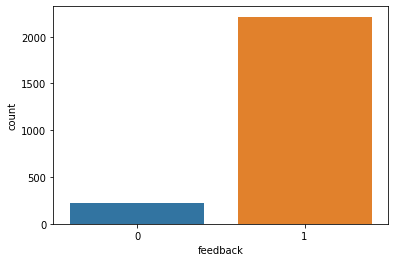

In [12]:
# Plotando um gráfico da variável "Feedback" para obter uma visão geral e possíveis outliers (valores discrepantes)
sns.countplot(x="feedback", data=dataset)

In [13]:
# Consultando novamente a estatística descritiva dos dados para ter certeza de que a distribuição não foi alterada após a etapa de pré-processamento dos dados
dataset.describe()

,rating,feedback
count,2435.000000,2435.000000
mean,4.435318,0.909240
std,1.109562,0.287326
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


*    Novamente, na exibição da estatística descritiva do dataset pós-processamento dos dados, podemos observar que temos 2435 revisões, onde a média das notas das revisões é igual a 4.43, o valor mínimo é 1, o valor máximo é 5 e o desvio padrão é de aproximadamente 1.1.

#### Avaliando a quantidade de reviews de acordo com cada avaliação (rating)


In [14]:
# Agrupar resultados de acordo com os valores da coluna "Rating"
dataset.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         141.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          80.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         113.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         345.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        1756.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

* Nota 1: 141 avaliações;
* Nota 2: 80 avaliações;
* Nota 3: 113 avaliações;
* Nota 4: 345 avaliações;
* Nota 5: 1756 avaliações;

#### Entendendo a coluna de reviews

In [15]:
# Aplicando fórmula para criar coluna "length", onde será contado a qtde de caracteres de cada entrada da coluna "verified_reviews"
dataset['length'] = dataset['verified_reviews'].apply(len)

# Verificando estrutura do dataset
dataset.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


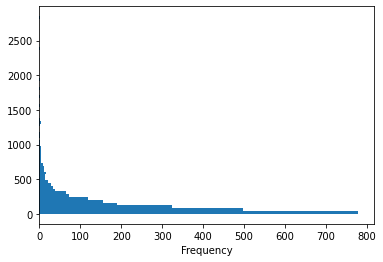

In [16]:
# Plotando gráfico para observar a frequência de reviews de acordo com a quantidade de caracteres
dataset['length'].plot(bins=70, kind='hist', orientation='horizontal')



*   É possível concluir que grande parte dos reviews está com uma média de caracteres de 0 a 500.



In [17]:
# Breve descrição das métricas referente a coluna "Length"
dataset.length.describe()

count    2435.000000
mean      137.899384
std       192.397673
min         1.000000
25%        31.000000
50%        77.000000
75%       170.500000
max      2851.000000
Name: length, dtype: float64

* A review mais longa tem 2851 caracteres e a mais curta tem apenas um caracter. 
Em média, as revisões tem aproximadamente 137 caracteres.

In [18]:
# Maior review
dataset[dataset['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [19]:
# Menor review
dataset[dataset['length'] == 1]['verified_reviews'].iloc[0]

'😍'

#### Limpando o texto

A limpeza do texto será realizada utilizando a biblioteca nltk para remover stopwords e fazer steamming.

In [20]:
# Realizando download do package de stopwords presente na biblioteca nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Removendo pontuações e stopwords
corpus=[]

for i in range(0,len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['verified_reviews'].iloc[i] )
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [22]:
# Utilizando Bag of words 
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,4].values

#### **Oversampling**

In [23]:
# Verificando se será necessário utilizar técnica de Oversampling
print(sorted(Counter(y).items()))

[(0, 221), (1, 2214)]


In [24]:
# Aplicando técnica de Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled,y_resampled = ros.fit_resample(X, y)

In [25]:
print(sorted(Counter(y_resampled).items()))

[(0, 2214), (1, 2214)]


### **Particionar os dados em Treino/Teste**

In [26]:
# Particionando os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.20, random_state = 0, stratify=y_resampled)
print('Existem {} amostras de treino e {} amostras de teste'.
format(X_train.shape[0], X_test.shape[0]))

Existem 3542 amostras de treino e 886 amostras de teste


## Avaliação 3 - Avaliação do Projeto de Ensino (Paper): Avaliação dos métodos e predição

### **Resultados e Predição**

Nesta etapa, estaremos utilizando, testando e avaliando os resultados dos seguintes classificadores:

*   SVC
*   RidgeClassifier
*   Perceptron
*   PassiveAggressiveClassifier
*   KNeighborsClassifier
*   SGDClassifier
*   Bernoulli
*   RandomForestClassifier


In [27]:
# Função "classifiers" com vários classificadores para uso

def classifiers(clf):

    """
    Classificadores:'SVC', 'RidgeClassifier', 'Perceptron', 
                    'PassiveAggressiveClassifier', 'KNeighborsClassifier',
                     'SGDClassifier', 'Bernoulli', 'RandomForestClassifier'
    """

    rng = np.random.RandomState(0)

    if clf == 'SVC':
        # SVM Classifier
        from sklearn.svm import SVC
        classifier = SVC(kernel='linear')
        classifier.fit(X_train, y_train)
        
    elif clf == 'RidgeClassifier':
        #Ridge Classifier
        from sklearn.linear_model import RidgeClassifier
        classifier = RidgeClassifier(random_state=rng)
        classifier.fit(X_train, y_train)
    
    elif clf == 'Perceptron':
        # Perceptron
        from sklearn.linear_model import Perceptron
        classifier = Perceptron( max_iter= 2000, alpha= 0.01, random_state=rng)
        classifier.fit(X_train, y_train)

    elif clf == 'PassiveAggressiveClassifier':
        # Passive Agressive Classifier
        from sklearn.linear_model import PassiveAggressiveClassifier
        classifier = PassiveAggressiveClassifier(max_iter=1000, 
        random_state=rng,tol=1e-3)
        classifier.fit(X_train, y_train)

    elif clf == 'KNeighborsClassifier':
        # KNN
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors=8)
        classifier.fit(X_train, y_train)

    elif clf == 'SGDClassifier':
        # SGD Classifier
        from sklearn.linear_model import SGDClassifier
        classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=rng)
        classifier.fit(X_train, y_train)

    elif clf == 'Bernoulli':
        # Bernoulli Classifier
        from sklearn.naive_bayes import BernoulliNB
        classifier = BernoulliNB()
        classifier.fit(X_train, y_train)
    
    elif clf == 'RandomForestClassifier':
        # RandomForestClassifier
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(random_state=rng)
        classifier.fit(X_train, y_train)

    return classifier

In [28]:
# Utilizando função "predict" para mensurar métricas
def predict(classifier):
    y_pred = classifier.predict(X_test)
    metric = metrics.classification_report(y_test, y_pred, target_names=["Positivo", "Negativo"])
    print(metric)
    return y_pred, metric

In [29]:
# Utilizando função "confusion_matrix_classifier" para realizar a criação de matriz de confusão
def confusion_matrix_classifier(y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(conf_mat, annot=True, fmt='.2f', xticklabels=["Positivo", "Negativo"], yticklabels=["Positivo", "Negativo"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return acc

In [30]:
# Criando array para inserir os modelos para posterior avaliação
models = [ 'SVC', 'RidgeClassifier', 'Perceptron', 'PassiveAggressiveClassifier',
            'KNeighborsClassifier', 'SGDClassifier', 'Bernoulli', 'RandomForestClassifier',]

SVC
              precision    recall  f1-score   support

    Positivo       0.91      0.98      0.95       443
    Negativo       0.98      0.91      0.94       443

    accuracy                           0.94       886
   macro avg       0.95      0.94      0.94       886
weighted avg       0.95      0.94      0.94       886



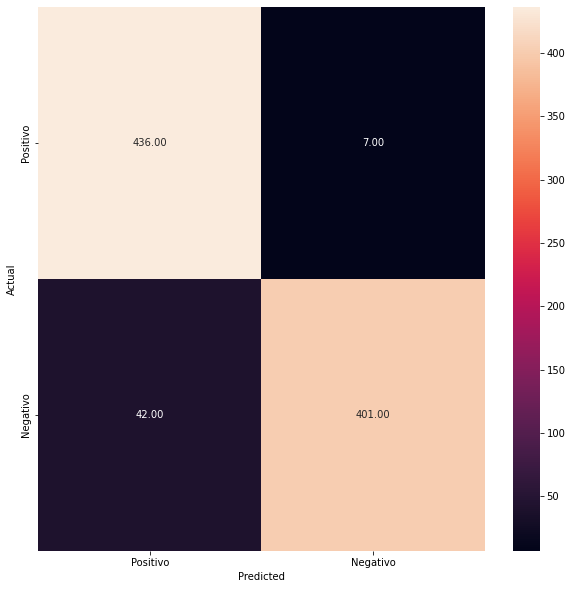

RidgeClassifier
              precision    recall  f1-score   support

    Positivo       0.91      0.92      0.91       443
    Negativo       0.92      0.91      0.91       443

    accuracy                           0.91       886
   macro avg       0.91      0.91      0.91       886
weighted avg       0.91      0.91      0.91       886



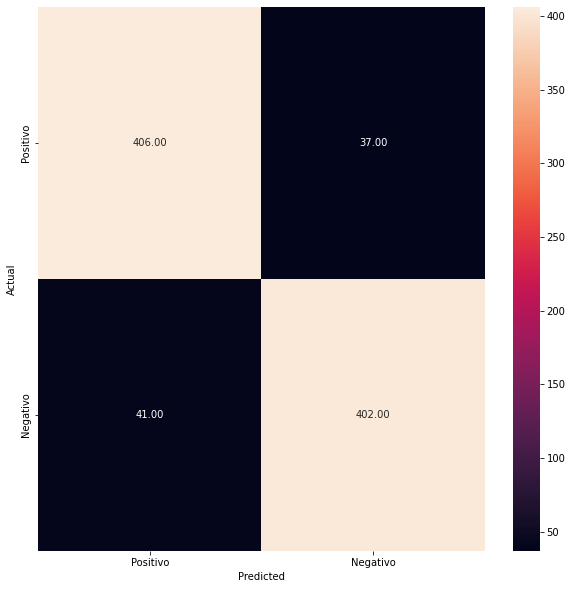

Perceptron
              precision    recall  f1-score   support

    Positivo       0.92      0.98      0.95       443
    Negativo       0.98      0.92      0.95       443

    accuracy                           0.95       886
   macro avg       0.95      0.95      0.95       886
weighted avg       0.95      0.95      0.95       886



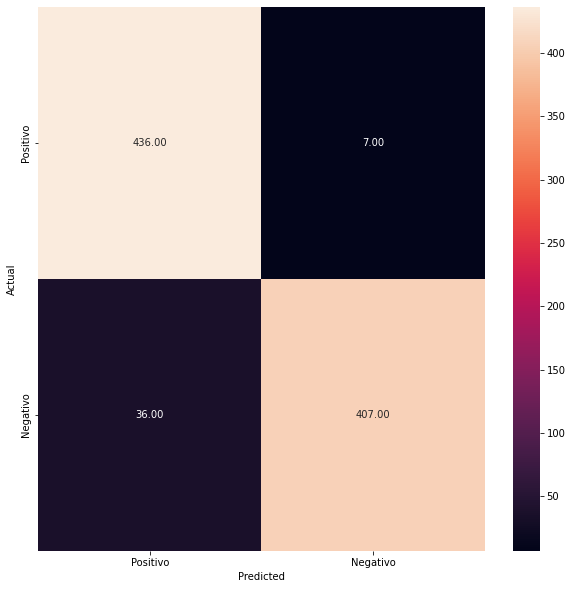

PassiveAggressiveClassifier
              precision    recall  f1-score   support

    Positivo       0.94      0.92      0.93       443
    Negativo       0.92      0.94      0.93       443

    accuracy                           0.93       886
   macro avg       0.93      0.93      0.93       886
weighted avg       0.93      0.93      0.93       886



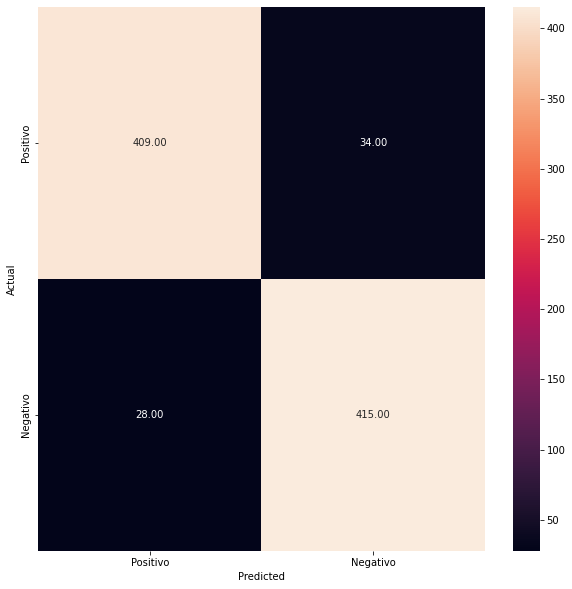

KNeighborsClassifier
              precision    recall  f1-score   support

    Positivo       0.80      1.00      0.89       443
    Negativo       1.00      0.75      0.86       443

    accuracy                           0.88       886
   macro avg       0.90      0.88      0.87       886
weighted avg       0.90      0.88      0.87       886



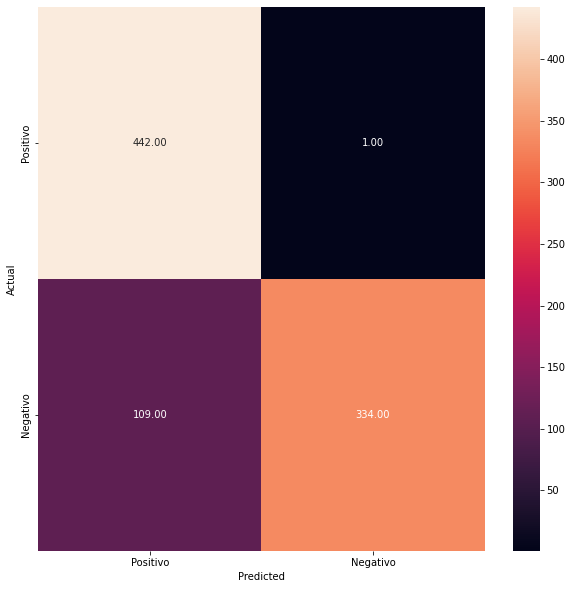

SGDClassifier
              precision    recall  f1-score   support

    Positivo       0.90      0.98      0.94       443
    Negativo       0.98      0.89      0.93       443

    accuracy                           0.94       886
   macro avg       0.94      0.94      0.94       886
weighted avg       0.94      0.94      0.94       886



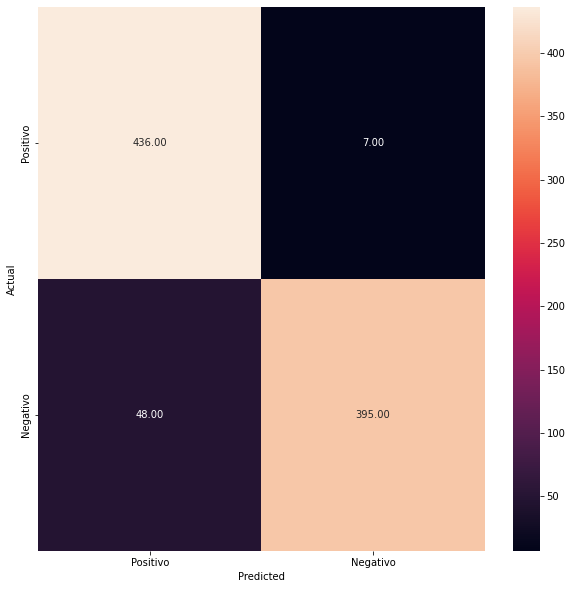

Bernoulli
              precision    recall  f1-score   support

    Positivo       0.94      0.72      0.81       443
    Negativo       0.77      0.95      0.85       443

    accuracy                           0.83       886
   macro avg       0.85      0.83      0.83       886
weighted avg       0.85      0.83      0.83       886



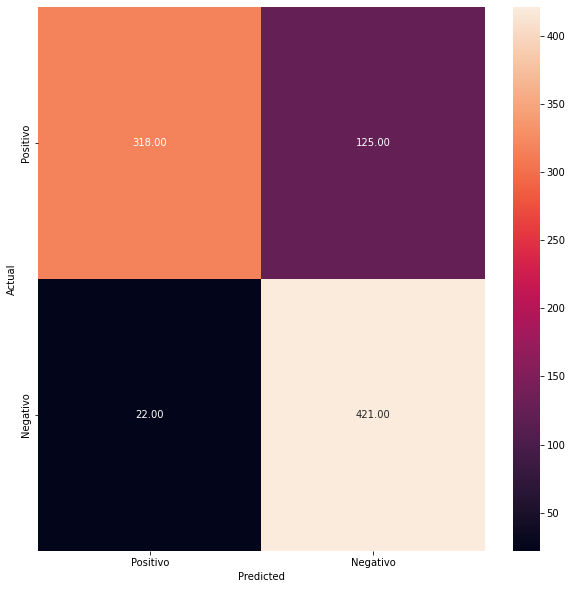

RandomForestClassifier
              precision    recall  f1-score   support

    Positivo       0.94      1.00      0.97       443
    Negativo       1.00      0.94      0.97       443

    accuracy                           0.97       886
   macro avg       0.97      0.97      0.97       886
weighted avg       0.97      0.97      0.97       886



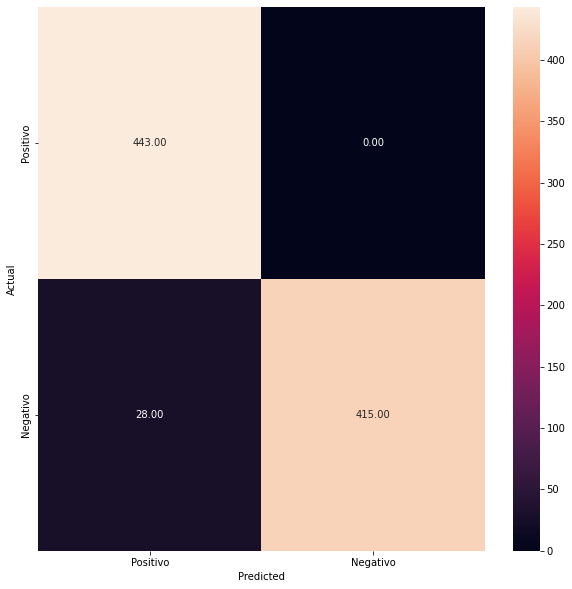

Resultado dos classificadores: 
[['SVC', 0.9446952595936795], ['RidgeClassifier', 0.9119638826185101], ['Perceptron', 0.9514672686230248], ['PassiveAggressiveClassifier', 0.9300225733634312], ['KNeighborsClassifier', 0.8758465011286681], ['SGDClassifier', 0.9379232505643341], ['Bernoulli', 0.8340857787810384], ['RandomForestClassifier', 0.9683972911963883]]
Maior Acurácia
0.9683972911963883
Melhor classificador e Acurácia
['RandomForestClassifier', 0.9683972911963883]


In [31]:
# Avaliando os classificadores
result = []
for model in models:
    print("=" * 80)
    print(model)
    r = classifiers(model)
    y_pred, metric = predict(r)
    acc = confusion_matrix_classifier(y_pred)
    result.append([model, acc])

scores = []
for i in range (len(result)):
    scores.append(result[i][1])
index = np.where(scores == np.amax(scores))[0][0]

print("=" * 80)
print("Resultado dos classificadores: ")

print(result)

print("=" * 80)
print("Maior Acurácia")
print(max(scores))

print("=" * 80)
print("Melhor classificador e Acurácia")
print(result[index])

## Conclusão



Dentre os classificadores avaliados, podemos observar que o que mais se destacou, tanto pela alta porcentagem de acerto quanto pelo baixo valor de falsos-positivos/negativos foi o classificador **RandomForestClassifier**

### **Classificadores:**

* **SVC**: Acurácia de 0.94 porém com alto número de falso-positivos (42) e número de falso-negativos (7) dentro do desvio padrão.
* **RidgeClassifier**: Acurácia de 0.91 com um alto número de falso-positivos (41) e falso-negativos (37).
* **Perceptron**: Acurácia de 0.95 com alto número de falso-positivos (36) e número de falso-negativos (7) dentro do desvio padrão.
PassiveAggressiveClassifier: Acurácia de 0.93 com alto número de falso-positivos (28) e falso-negativos (34).
* **KneighborsClassifier**: Acurácia de 0.88 com um número extremamente alto de falso-positivos (109) e com apenas um único falso-negativo (1).
* **SGDClassifier**: Acurácia de 0.94 com um alto número de falso-positivos (48) e número de falso-negativos (7) dentro do desvio padrão. Resultado similar ao do classificador SVC com uma leve variação na precisão e recall.
* **Bernoulli**: Acurácia de 0.83 com um alto número de falso-positivos (22) e um número extremamente alto de falso-negativos (125). Nesta análise, pode ser considerado o pior classificador.
* **RandomForestClassifier**: Acurácia de incríveis 0.97 com um alto número de falso-positivos (28) apenas. Nesta análise, pode ser considerado o melhor classificador.

## Referências:

* Documentação do Pandas - https://pandas.pydata.org/docs/reference/frame.html

* Documentação API Matplotlib - https://matplotlib.org/stable/api/index

* Documentação API Seaborn - https://seaborn.pydata.org/api.html

* Referências de código - https://www.kaggle.com/sid321axn/amazon-alexa-reviews/code

* Função "Train_test_split" - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

* StackOverFlow - https://pt.stackoverflow.com/

* Utilizado referências e trechos de código diretos do livro didático "Processamento de Linguagem Natural"